In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Import Data

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.shape

(466285, 75)

In [3]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Labeling the data

In [4]:
loan_data = df.copy()
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### In our data, we dont have target, so we need to make target from loan status column

In [5]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [6]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

#### Insight :

1. We can divide target by binary classification, namely good loan and bad loan

2. Target 0 means no payment problems ( good loan)

3. Target 1 means have a payment problems (bad loan)

4. Good loan has a loan status : Fully paid, Current, In Grace Period, Does not meet the credit policy, Status : fully paid

In [7]:
#we can change the loan status column into binary number
good_loan = ['Fully Paid', 'Current', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']
loan_data['loan_status'] = np.where(loan_data['loan_status'].isin(good_loan),0,1)
loan_data['loan_status'].value_counts()

0    414099
1     52186
Name: loan_status, dtype: int64

#### Check the difference between good and bad loans

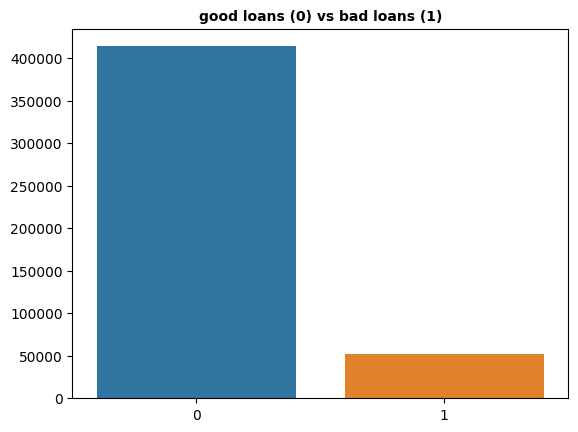

In [8]:
plt.title('good loans (0) vs bad loans (1)', fontsize = 10, weight = 'bold')
sns.barplot(x = loan_data['loan_status'].value_counts().index, y = loan_data['loan_status'].value_counts().values)
plt.show()

# 3. Data preprocessing and Cleaning

### What we will do :

1. We will drop 'Unnamed : 0' because it is same to index

2. We will drop the identifier column such as : id, member_id, title, emp_title, url, zip_code, desc, and policy_code

3. we will drop the sub_grade column because it have same information as the grade column

4. We will drop the unnecessary columns

5. We will drop the columns which have >20% missing values 

6. We will drop the columns that have same value to another column


### Drop the Unnamed : 0 column

In [9]:
loan_data.drop(columns =['Unnamed: 0'], inplace = True)

### Drop identifier Columns

In [10]:
identifier_columns = ['id', 'member_id', 'title', 'emp_title', 'url', 'zip_code', 'desc','policy_code']
loan_data.drop(columns = identifier_columns, inplace = True)

### Drop sub_grade column

In [11]:
# we drop sub grade because it have similar
loan_data[['grade', 'sub_grade']].head()

,grade,sub_grade
0,B,B2
1,C,C4
2,C,C5
3,C,C1
4,B,B5


In [12]:
loan_data.drop(columns = 'sub_grade', inplace = True)

### Drop unnecessary columns

We need to drop columns which related to loan_status. Our goals is to predict whether a loan is risky or not, so we need a dataset before we invest in a loan, not after. 

for example like 'total_rec_late_fee' column.  this column mean how much we pay if we dont pay our loan on time. But we dont need this column because we can see from loan_status how long he late for pay the loan. We can simply call this data by data leakage.

Data leakage is When data set contains relevant data, but similar data is not obtainable when the models are used for predictions, data leakage (or leaking) occurs. This results in great success on the training dataset (and possibly even the validation accuracy), but lack of performance in production.

When data leakage occurs, it usually leads to overly optimistic outcomes during the model building phase, followed by the unpleasant surprise of poor results after the prediction model is implemented and tested on new data.

In [13]:
leakage_column = ['issue_d', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
               'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
               'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d']
loan_data[leakage_column].head()

,issue_d,pymnt_plan,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d
0,Dec-11,n,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN
1,Dec-11,n,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN
2,Dec-11,n,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN
3,Dec-11,n,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN
4,Dec-11,n,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16


In [14]:
loan_data.drop(columns = leakage_column, inplace = True)

### Drop columns which have >20% missing value

In [15]:
#check features that have missing value
loan_data.isnull().sum().sort_values(ascending = False)

inq_last_12m                   466285
annual_inc_joint               466285
open_il_6m                     466285
open_acc_6m                    466285
open_il_24m                    466285
mths_since_rcnt_il             466285
total_bal_il                   466285
il_util                        466285
open_il_12m                    466285
open_rv_12m                    466285
open_rv_24m                    466285
dti_joint                      466285
max_bal_bc                     466285
all_util                       466285
verification_status_joint      466285
inq_fi                         466285
total_cu_tl                    466285
mths_since_last_record         403647
mths_since_last_major_derog    367311
mths_since_last_delinq         250351
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
emp_length                      21008
revol_util                        340
collections_12_mths_ex_med        145
last_credit_

#### There are so many null datas, its better we make it into bar chart for better visualization

In [16]:
total_null = loan_data.isnull().sum()
percent_null = total_null * 100 / len(df)
null_df = pd.DataFrame({'total_null' : total_null,
                       'percent_null' : percent_null})
null_df.sort_values('percent_null', ascending=False, inplace = True)
null = null_df[null_df['percent_null'] > 0].reset_index()
null

,index,total_null,percent_null
0,inq_last_12m,466285,100.000000
1,annual_inc_joint,466285,100.000000
2,open_il_6m,466285,100.000000
3,open_acc_6m,466285,100.000000
4,open_il_24m,466285,100.000000
5,mths_since_rcnt_il,466285,100.000000
6,total_bal_il,466285,100.000000
7,il_util,466285,100.000000
8,open_il_12m,466285,100.000000
9,open_rv_12m,466285,100.000000


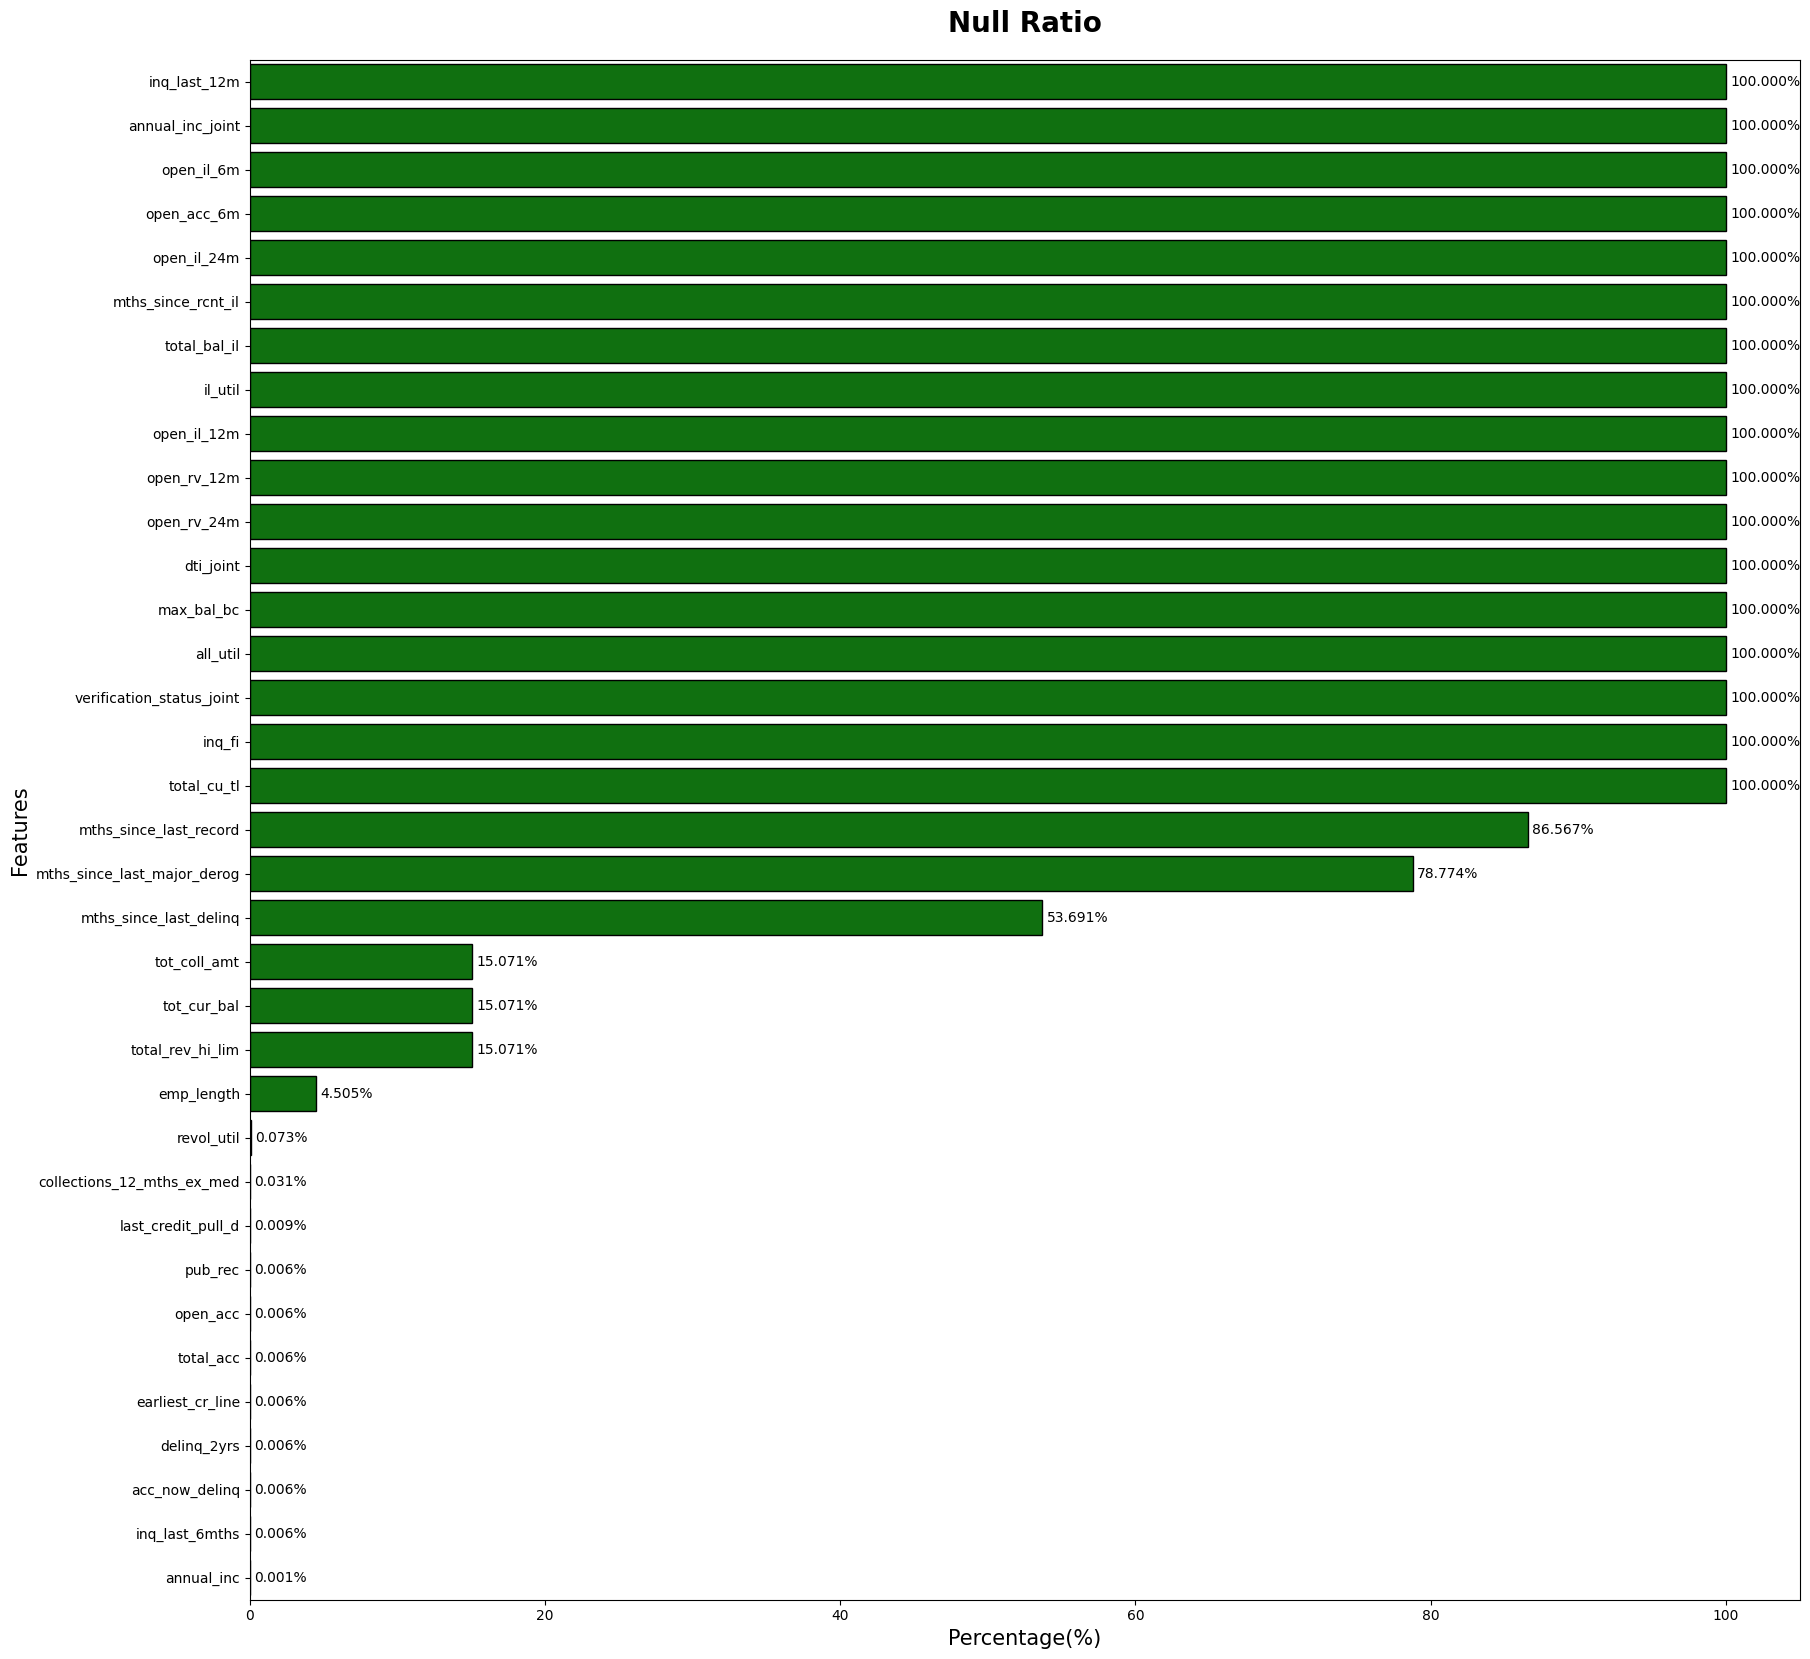

In [17]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(20,20))
plt.title('Null Ratio', fontsize = 20, color = 'Black', weight = 'bold', pad = 20)
sns.barplot(data = null, x = 'percent_null', y = 'index', color = 'Green', edgecolor = 'Black')
plt.bar_label(ax.containers[0], padding =3, fmt='%.3f%%')
plt.xlabel('Percentage(%)', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

In [18]:
index_null = null_df.loc[null_df['percent_null'] > 50].index.tolist()
loan_data.drop(columns = index_null, inplace = True)

### We check the correlation between features

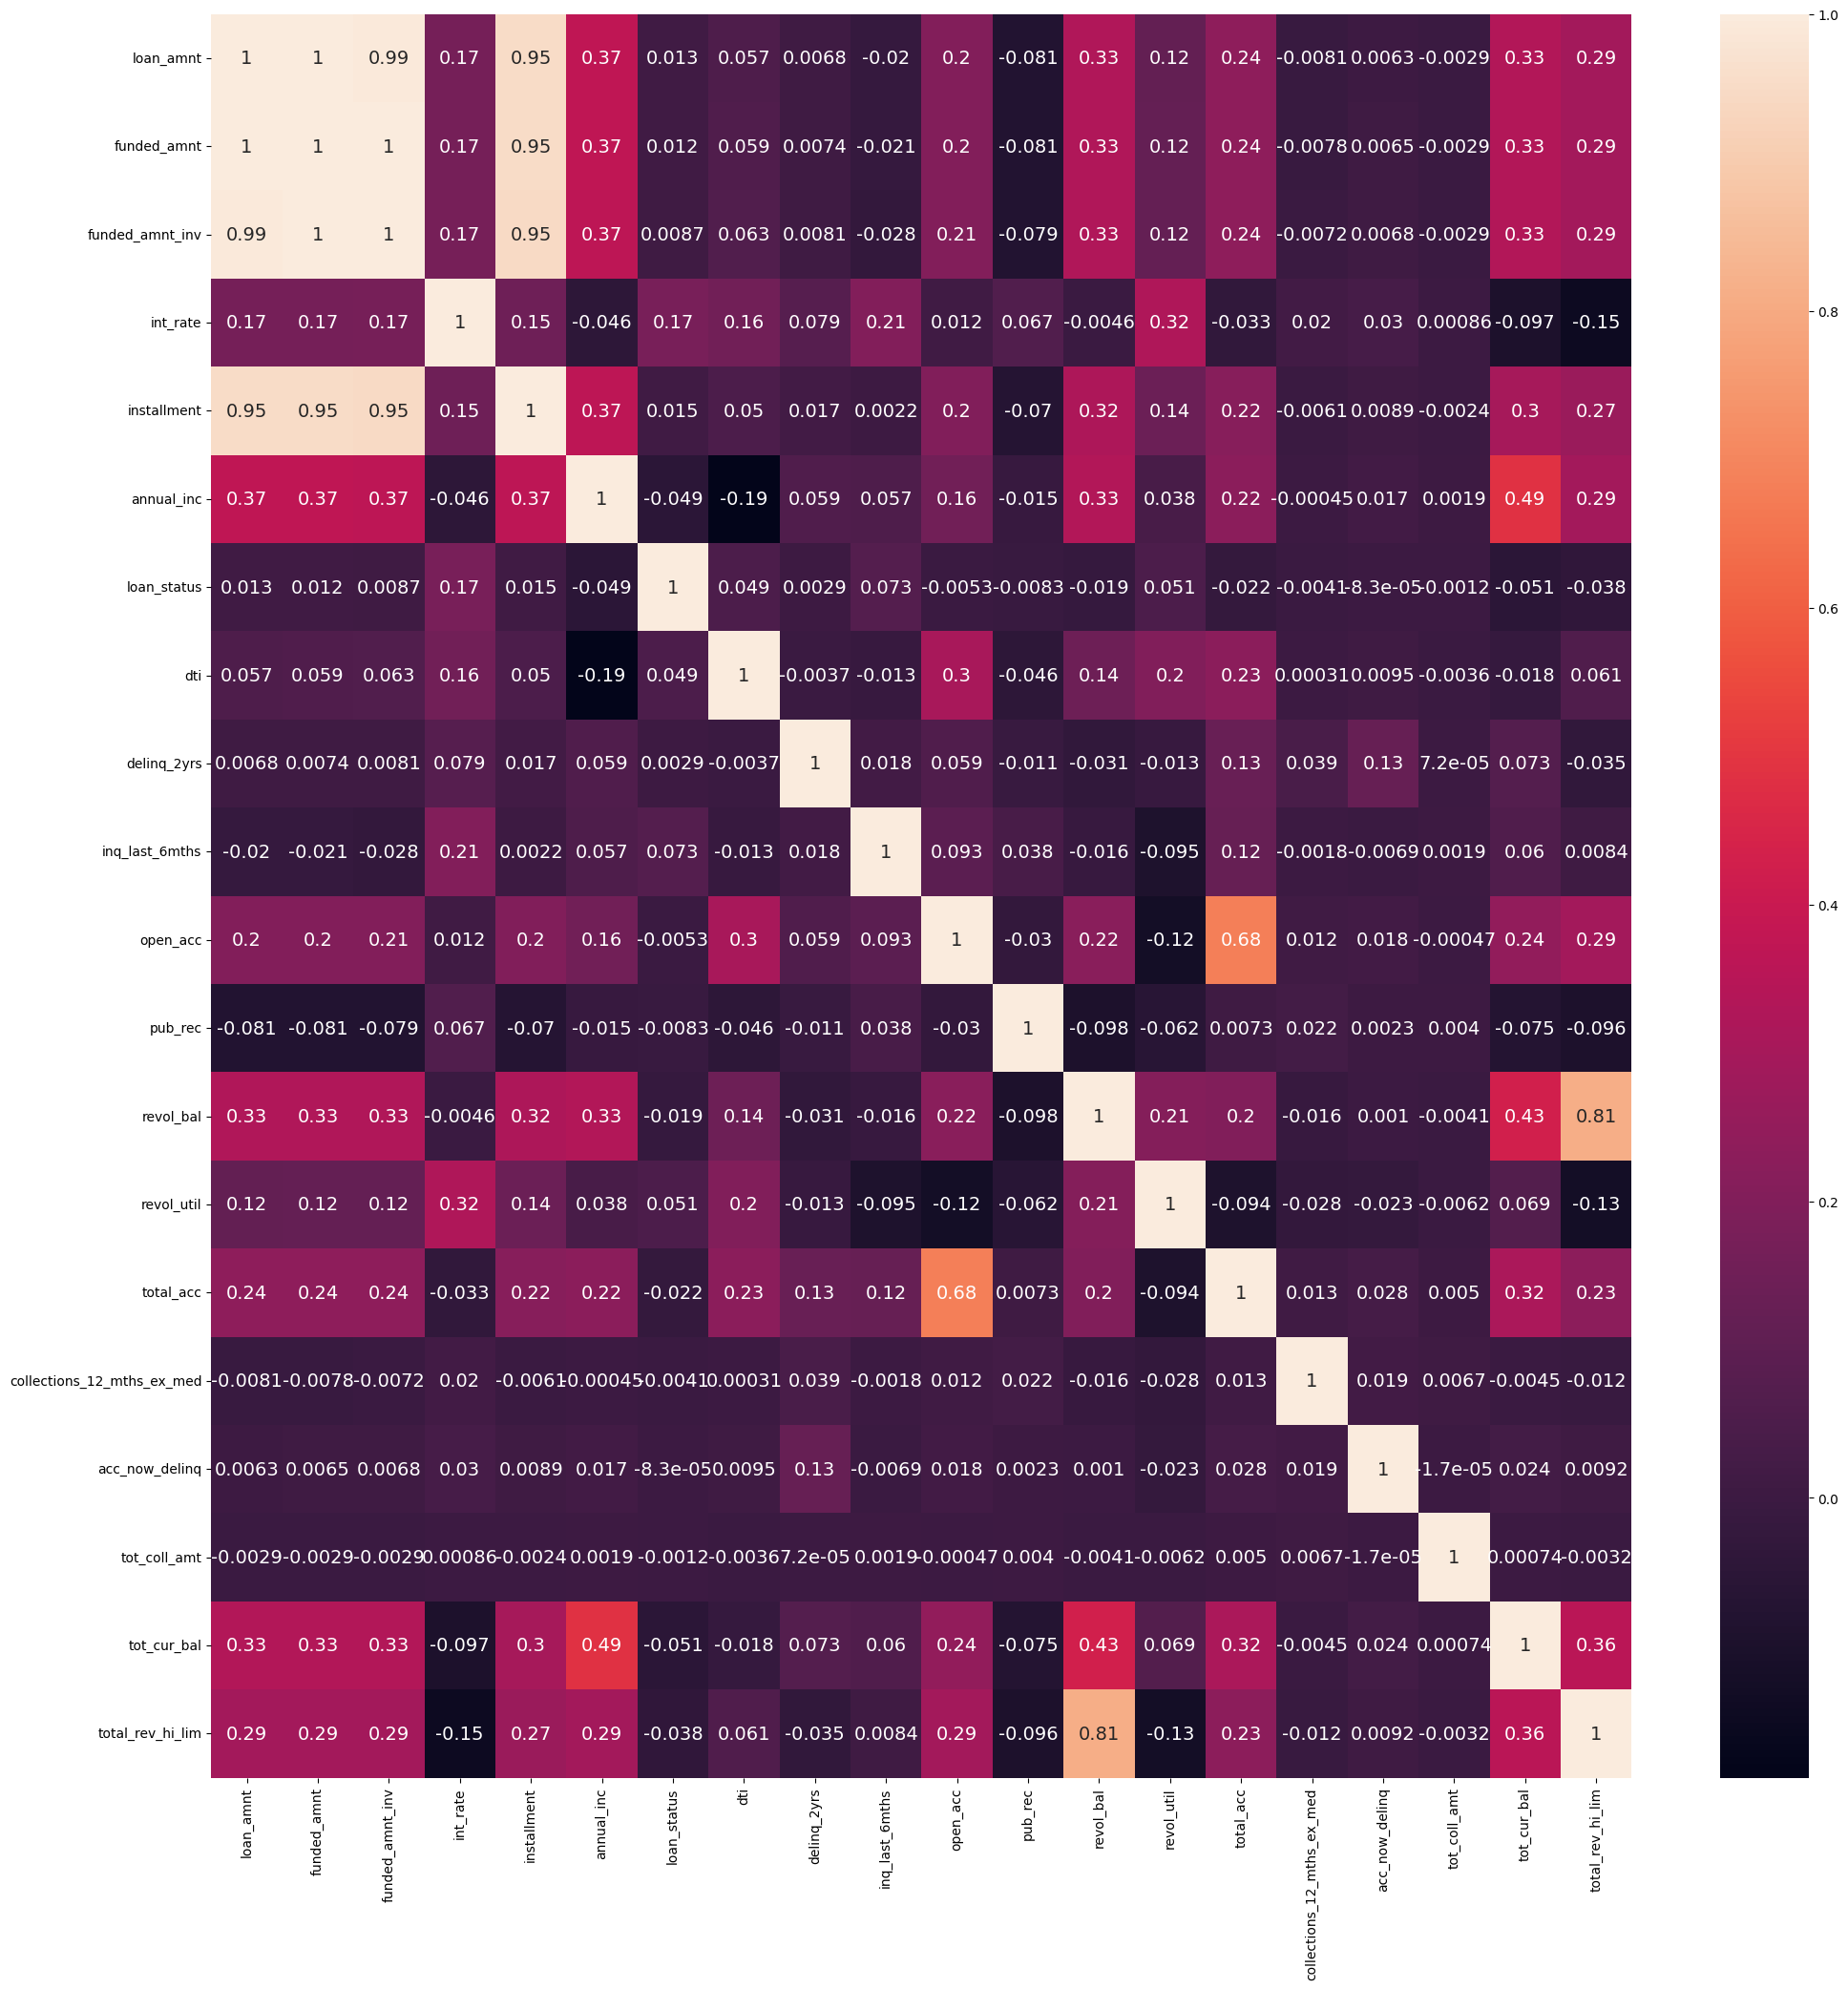

In [19]:
plt.figure(figsize=(24,24))
sns.heatmap(loan_data.corr(), annot=True, annot_kws={'size':14})
plt.show()

In [20]:
loan_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment']].head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment
0,5000,5000,4975.0,162.87
1,2500,2500,2500.0,59.83
2,2400,2400,2400.0,84.33
3,10000,10000,10000.0,339.31
4,3000,3000,3000.0,67.79


In [21]:
loan_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment
count,466285.000000,466285.000000,466285.000000,466285.000000
mean,14317.277577,14291.801044,14222.329888,432.061201
std,8286.509164,8274.371300,8297.637788,243.485550
min,500.000000,500.000000,0.000000,15.670000
25%,8000.000000,8000.000000,8000.000000,256.690000
50%,12000.000000,12000.000000,12000.000000,379.890000
75%,20000.000000,20000.000000,19950.000000,566.580000
max,35000.000000,35000.000000,35000.000000,1409.990000


as you can see, loan_amnt, funded_amnt, funded_amnt_inv almost have similar value, so we can drop 2 columns

In [22]:
loan_data.drop(columns = ['funded_amnt', 'funded_amnt_inv'], inplace = True)

In [23]:
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,0,...,83.7,9.0,f,Jan-16,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,1,...,9.4,4.0,f,Sep-13,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,0,...,98.5,10.0,f,Jan-16,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,0,...,21.0,37.0,f,Jan-15,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,0,...,53.9,38.0,f,Jan-16,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN


### Check features that have missing value > 15%

- tot_cur_bal : Total current balance of all accounts
- tot_coll_amt : Total collection amounts ever owed
- total_rev_hi_lim : Total revolving high credit/credit limit

In [24]:
loan_data[['tot_cur_bal', 'tot_coll_amt', 'total_rev_hi_lim']].sample(10)

,tot_cur_bal,tot_coll_amt,total_rev_hi_lim
24603,NaN,NaN,NaN
225608,NaN,NaN,NaN
364462,89145.0,0.0,11000.0
3362,NaN,NaN,NaN
463230,659418.0,0.0,29700.0
464346,159047.0,0.0,17800.0
89199,121656.0,0.0,44000.0
297428,38246.0,221.0,27700.0
181565,157203.0,0.0,40400.0
440967,32451.0,0.0,4700.0


as you can see, this 3 columns have missing value in the same index, so we can assume that customer did not borrow loan again

In [25]:
loan_data[['tot_cur_bal', 'tot_coll_amt', 'total_rev_hi_lim']].describe()

,tot_cur_bal,tot_coll_amt,total_rev_hi_lim
count,3.960090e+05,3.960090e+05,3.960090e+05
mean,1.388017e+05,1.919135e+02,3.037909e+04
std,1.521147e+05,1.463021e+04,3.724713e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.861800e+04,0.000000e+00,1.350000e+04
50%,8.153900e+04,0.000000e+00,2.280000e+04
75%,2.089530e+05,0.000000e+00,3.790000e+04
max,8.000078e+06,9.152545e+06,9.999999e+06


In [26]:
for i in ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'] :
      loan_data[i] = loan_data[i].fillna(0)

### Preprocessing features that have object and date (data type transformation)

In [27]:
loan_data[['term', 'emp_length', 'earliest_cr_line', 'last_credit_pull_d']].head()

,term,emp_length,earliest_cr_line,last_credit_pull_d
0,36 months,10+ years,Jan-85,Jan-16
1,60 months,< 1 year,Apr-99,Sep-13
2,36 months,10+ years,Nov-01,Jan-16
3,36 months,10+ years,Feb-96,Jan-15
4,60 months,1 year,Jan-96,Jan-16


#### Term

In [28]:
loan_data['term'] = loan_data['term'].str.replace('months', '').astype(int)
loan_data['term']
loan_data.rename(columns = {'term' : 'term(months)'}, inplace = True)

#### emp_length

In [29]:
emp_map = {
    '< 1 year' : '0',
    '1 year' : '1',
    '2 years' : '2',
    '3 years' : '3',
    '4 years' : '4',
    '5 years' : '5',
    '6 years' : '6',
    '7 years' : '7',
    '8 years' : '8',
    '9 years' : '9',
    '10+ years' : '10'
}

loan_data['emp_length'] = loan_data['emp_length'].map(emp_map).fillna('0').astype(int)

#### earliest_cr_line

In [30]:
# Extracts the date and the time
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [31]:
# we are assuming now is December 2022
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2022-12-31') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [32]:
# Shows some descriptive statisics for the values of a column
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        300.482430
std          93.974829
min        -551.000000
25%         244.000000
50%         286.000000
75%         346.000000
max         648.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [33]:
# display the rows where a variable has negative value
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-476.0
1770,Sep-68,2068-09-01,-548.0
2799,Sep-64,2064-09-01,-500.0
3282,Sep-67,2067-09-01,-536.0
3359,Feb-65,2065-02-01,-505.0
...,...,...,...
464003,Jan-68,2068-01-01,-540.0
464260,Jul-66,2066-07-01,-522.0
465100,Oct-67,2067-10-01,-537.0
465500,Sep-67,2067-09-01,-536.0


Dates from 1969 and before are not being converted well, they have become 2069 and similar,so we need to change it again

In [34]:
# Change the dtype into string and replace the year 2069 etc into 1969 etc
loan_data['earliest_cr_line_date'] = loan_data['earliest_cr_line_date'].astype(str)
loan_data['earliest_cr_line_date'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['earliest_cr_line_date'][loan_data['mths_since_earliest_cr_line'] < 0].str.replace('20','19')

In [35]:
# change dtype into datetime again
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line_date'])
loan_data['earliest_cr_line_date']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line_date, Length: 466285, dtype: datetime64[ns]

In [36]:
# check the data again to see the changes (Assume in Dec 2022)
loan_data['mths_since_earliest_cr_line_date'] = round(pd.to_numeric((pd.to_datetime('2022-12-31') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
# Shows some descriptive statisics for the values of a column.
loan_data['mths_since_earliest_cr_line_date'].describe()

count    466256.000000
mean        303.491078
std          86.928944
min         134.000000
25%         245.000000
50%         287.000000
75%         346.000000
max         948.000000
Name: mths_since_earliest_cr_line_date, dtype: float64

In [37]:
loan_data.drop(columns = ['earliest_cr_line_date' ,'mths_since_earliest_cr_line', 'earliest_cr_line'], inplace = True)

#### last_credit_pull_d

In [38]:
# Assume now in December 2022
loan_data['last_credit_pull_d'] = pd.to_datetime(loan_data['last_credit_pull_d'], format = '%b-%y').fillna(pd.to_datetime("2016-01-01"))

# calculate the difference between two dates in months
loan_data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['last_credit_pull_d']) / np.timedelta64(1, 'M')))

# Shows descriptive statisics for the values of a column.
loan_data['mths_since_last_credit_pull_d'].describe()

count    466285.000000
mean         27.045223
std           9.636066
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [39]:
#drop column last_credit_pull_d as we don't use it anymore
loan_data.drop(columns = ['last_credit_pull_d'], inplace = True)

### Check for missing value

In [40]:
loan_data.isnull().sum().sort_values(ascending = False).head(5)

revol_util                          340
collections_12_mths_ex_med          145
inq_last_6mths                       29
pub_rec                              29
mths_since_earliest_cr_line_date     29
dtype: int64

In [41]:
#drop data that still have null values
loan_data.dropna(subset = ['revol_util'], inplace = True)

#reset index
loan_data.reset_index(drop= True, inplace = True)

In [42]:
#check where is the null again
loan_data.isnull().sum().sort_values(ascending = False).head(5)

collections_12_mths_ex_med          113
loan_amnt                             0
open_acc                              0
mths_since_earliest_cr_line_date      0
total_rev_hi_lim                      0
dtype: int64

In [43]:
#drop data that still have null values
loan_data.dropna(subset = ['collections_12_mths_ex_med'], inplace = True)

#reset index
loan_data.reset_index(drop= True, inplace = True)

In [44]:
loan_data.isnull().sum().values.any()

False

# 4. Data Analyst

In [45]:
loan_data.head(5)

,loan_amnt,term(months),int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line_date,mths_since_last_credit_pull_d
0,5000,36,10.65,162.87,B,10,RENT,24000.0,Verified,0,...,9.0,f,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,456.0,23.0
1,2500,60,15.27,59.83,C,0,RENT,30000.0,Source Verified,1,...,4.0,f,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,285.0,51.0
2,2400,36,15.96,84.33,C,10,RENT,12252.0,Not Verified,0,...,10.0,f,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,254.0,23.0
3,10000,36,13.49,339.31,C,10,RENT,49200.0,Source Verified,0,...,37.0,f,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,323.0,35.0
4,3000,60,12.69,67.79,B,1,RENT,80000.0,Source Verified,0,...,38.0,f,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,324.0,23.0


#### 1. Purpose

Purpose : A category provided by the borrower for the loan request. 

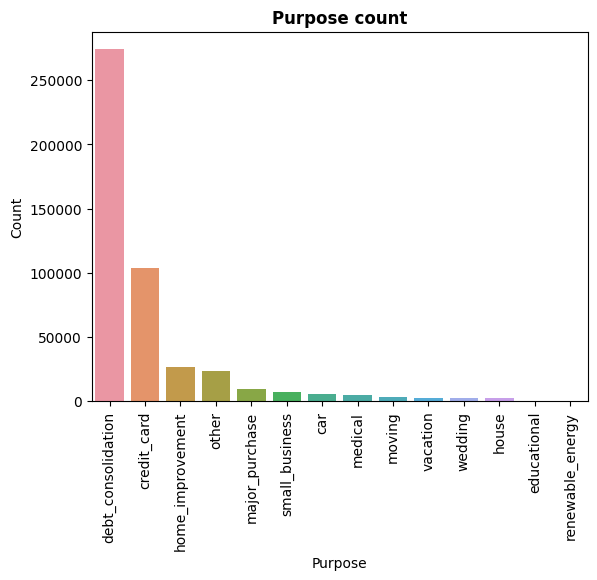

In [46]:
sns.barplot(x =  loan_data['purpose'].value_counts().index, y= loan_data['purpose'].value_counts().values)
plt.title('Purpose count', weight = 'bold')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

#### 2. Grade

Grade : LC assigned loan grade

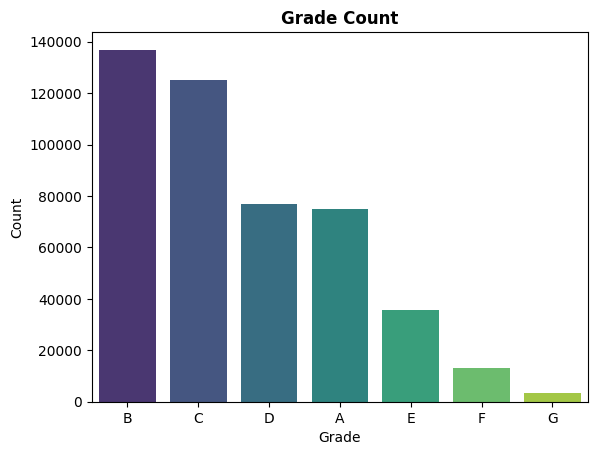

In [47]:
sns.barplot(x = loan_data['grade'].value_counts().index, y = loan_data['grade'].value_counts().values, palette = 'viridis' )
plt.title('Grade Count', weight = 'bold')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

# 5. Dummies for categorical columns

We need to convert categorical column to binary number using get dummies

In [48]:
# Convert categorical columns with One Hot Encoding
cat_cols = [col for col in loan_data.select_dtypes(include='object').columns.tolist()]
dummies_cols = pd.get_dummies(loan_data[cat_cols], drop_first=True)

In [49]:
dummies_cols.shape

(465832, 76)

# 6. Standarization

Standarization is used to make all the interval between numeric equal

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
num_cols = [col for col in loan_data.columns.tolist() if col not in cat_cols + ['loan_status']]
ss = StandardScaler()
std_cols = pd.DataFrame(ss.fit_transform(loan_data[num_cols]), columns=num_cols)

In [52]:
std_cols.head()

,loan_amnt,term(months),int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line_date,mths_since_last_credit_pull_d
0,-1.125140,-0.616373,-0.729504,-1.106326,1.138392,-0.896802,1.328259,-0.357015,0.179376,-1.643278,...,-0.125215,1.159694,-1.385598,-0.083636,-0.058281,-0.012088,-0.793012,-0.717059,1.754222,-0.420802
1,-1.426896,1.622394,0.330718,-1.529605,-1.524195,-0.787588,-2.066909,-0.357015,3.849043,-1.643278,...,-0.704201,-1.971313,-1.816703,-0.083636,-0.058281,-0.012088,-0.793012,-0.717059,-0.212696,2.506273
2,-1.438966,-0.616373,0.489063,-1.428961,1.138392,-1.110642,-1.083393,-0.357015,1.096793,-1.843870,...,-0.642774,1.783367,-1.299378,-0.083636,-0.058281,-0.012088,-0.793012,-0.717059,-0.569272,-0.420802
3,-0.521628,-0.616373,-0.077766,-0.381527,1.138392,-0.438105,0.353661,-0.357015,0.179376,-0.239130,...,-0.514885,-1.482488,1.028587,-0.083636,-0.058281,-0.012088,-0.793012,-0.717059,0.224397,0.833659
4,-1.366544,1.622394,-0.261354,-1.496906,-1.257936,0.122525,0.091220,-0.357015,-0.738040,0.763833,...,0.559007,-0.096080,1.114808,-0.083636,-0.058281,-0.012088,-0.793012,-0.717059,0.235899,-0.420802


# 7. Combine dummies data with standarization data

In [53]:
final_data = pd.concat([dummies_cols, std_cols, loan_data[['loan_status']]], axis=1)
final_data.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line_date,mths_since_last_credit_pull_d,loan_status
0,1,0,0,0,0,0,0,0,0,0,...,1.159694,-1.385598,-0.083636,-0.058281,-0.012088,-0.793012,-0.717059,1.754222,-0.420802,0
1,0,1,0,0,0,0,0,0,0,0,...,-1.971313,-1.816703,-0.083636,-0.058281,-0.012088,-0.793012,-0.717059,-0.212696,2.506273,1
2,0,1,0,0,0,0,0,0,0,0,...,1.783367,-1.299378,-0.083636,-0.058281,-0.012088,-0.793012,-0.717059,-0.569272,-0.420802,0
3,0,1,0,0,0,0,0,0,0,0,...,-1.482488,1.028587,-0.083636,-0.058281,-0.012088,-0.793012,-0.717059,0.224397,0.833659,0
4,1,0,0,0,0,0,0,0,0,0,...,-0.096080,1.114808,-0.083636,-0.058281,-0.012088,-0.793012,-0.717059,0.235899,-0.420802,0


# 8. Model Training and Prediction

### Split data into variables and target

In [54]:
x = final_data.drop('loan_status', axis = 1)
y = final_data['loan_status']

### Split data into train and test

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [57]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(372665, 97) (93167, 97) (372665,) (93167,)


### Checking for class imbalance in final_data

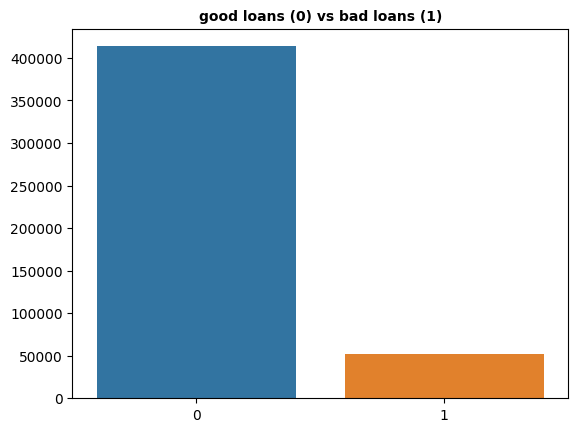

In [58]:
plt.title('good loans (0) vs bad loans (1)', fontsize = 10, weight = 'bold')
sns.barplot(x = final_data['loan_status'].value_counts().index, y = loan_data['loan_status'].value_counts().values)
plt.show()

In [59]:
y_train.value_counts()

0    331073
1     41592
Name: loan_status, dtype: int64

From the chart and data above, data classified as bad loans has less data than good loan data. So we can assumpt this dataset has imbalanced data.

# 9. Train model without handling the imbalance data

In [60]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve

In [61]:
# train
model = LogisticRegression(max_iter=600).fit(x_train, y_train)
# predic
y_pred = model.predict(x_test)

# classification report
target_names = ['good loan', 'bad loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

   good loan     0.8881    0.9981    0.9399     82655
    bad loan     0.4348    0.0114    0.0222     10512

    accuracy                         0.8868     93167
   macro avg     0.6615    0.5048    0.4811     93167
weighted avg     0.8370    0.8868    0.8364     93167



### Oversampling Minority Class to Resolve Class Imbalance

Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.

In [62]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

#check value counts before and after oversampling
print('Before OverSampling:\n{}'.format(y_train.value_counts()))
print('\nAfter OverSampling:\n{}'.format(y_train_ros.value_counts()))

Before OverSampling:
0    331073
1     41592
Name: loan_status, dtype: int64

After OverSampling:
0    331073
1    331073
Name: loan_status, dtype: int64


### Train the model after oversampling

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### 1. Logistic Regression

In [64]:
# Training 
lr_ros = LogisticRegression(max_iter=600)  
lr_ros.fit(x_train_ros, y_train_ros)

#predicting
y_pred_lr_ros = lr_ros.predict(x_test)

#classification report
target_names = ['good loan', 'bad loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_lr_ros, digits=4, target_names = target_names))


Classification_Report:
              precision    recall  f1-score   support

   good loan     0.9370    0.6518    0.7688     82655
    bad loan     0.1932    0.6557    0.2985     10512

    accuracy                         0.6522     93167
   macro avg     0.5651    0.6537    0.5336     93167
weighted avg     0.8531    0.6522    0.7157     93167



### 2. Random Forest Classifier

In [65]:
#training
rfc_ros = RandomForestClassifier(max_depth=10, n_estimators=20)
rfc_ros.fit(x_train_ros, y_train_ros)

#predicting
y_pred_rfc_ros = rfc_ros.predict(x_test)

#classification report
target_names = ['good loan', 'bad loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_rfc_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

   good loan     0.9379    0.6909    0.7957     82655
    bad loan     0.2086    0.6405    0.3147     10512

    accuracy                         0.6852     93167
   macro avg     0.5733    0.6657    0.5552     93167
weighted avg     0.8556    0.6852    0.7414     93167



### 3. Decision Tree Classifier

In [66]:
#training
dtc_ros = DecisionTreeClassifier(max_depth = 10)
dtc_ros.fit(x_train_ros, y_train_ros)

#predicting
y_pred_dtc_ros = dtc_ros.predict(x_test)

#classification report
target_names = ['good loan', 'bad loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_dtc_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

   good loan     0.9369    0.7158    0.8115     82655
    bad loan     0.2175    0.6212    0.3222     10512

    accuracy                         0.7051     93167
   macro avg     0.5772    0.6685    0.5669     93167
weighted avg     0.8558    0.7051    0.7563     93167



### 4. K-Nearest Neighbors

In [67]:
#training
knn_ros = KNeighborsClassifier(n_neighbors=20)
knn_ros.fit(x_train_ros, y_train_ros)

#predicting
y_pred_knn_ros = knn_ros.predict(x_test)

#classification report
target_names = ['good loan', 'bad loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_knn_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

   good loan     0.9183    0.6814    0.7823     82655
    bad loan     0.1728    0.5233    0.2598     10512

    accuracy                         0.6636     93167
   macro avg     0.5456    0.6024    0.5211     93167
weighted avg     0.8342    0.6636    0.7234     93167



### 5. XGBoost Classifier

In [68]:
#training
xgb_ros = XGBClassifier(max_depth=5)
xgb_ros.fit(x_train_ros, y_train_ros)

#predicting
y_pred_xgb_ros = xgb_ros.predict(x_test)

#classification report
target_names = ['good loan', 'bad loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_xgb_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

   good loan     0.9416    0.7208    0.8166     82655
    bad loan     0.2281    0.6488    0.3376     10512

    accuracy                         0.7127     93167
   macro avg     0.5849    0.6848    0.5771     93167
weighted avg     0.8611    0.7127    0.7625     93167



### 6. AdaBoost Classifier

In [69]:
#building model
adb_ros = AdaBoostClassifier(n_estimators = 100)
adb_ros.fit(x_train_ros, y_train_ros)

#predicting
y_pred_adb_ros = adb_ros.predict(x_test)

#classification report
target_names = ['good loan', 'bad loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_adb_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

   good loan     0.9403    0.6670    0.7804     82655
    bad loan     0.2030    0.6670    0.3113     10512

    accuracy                         0.6670     93167
   macro avg     0.5717    0.6670    0.5459     93167
weighted avg     0.8571    0.6670    0.7275     93167



#### Summary

1. From the classification report we can see the F1-score from good loan and bad loan. F1-score means What percent of positive predictions were correct.


2. From the model that have been done, the best result came from the XGBoost CLassifier with accuracy value for good loan 81.66% and accuracry value for bad loan 33.76%. The accuracy value for bad loan is very low because we have an imbalanced dataset thats make us to oversampling the data. Thats why the accuracy valur for bad loan is quite low.